In [58]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [13]:
import pandas as pd
import numpy as np
import csv
from tqdm import tqdm
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
file_one = "../clean-data/Whiskey_data/Whiskey_Advocate_All_scraped_KHupdate-with-description.csv"

In [75]:
df = pd.read_csv(file_one, encoding="ISO-8859-1").set_index('row_caller')
blended_df=df[df['Blended'] == 1]
bourbon_df=df[df['Bourbon'] == 1]
flavored_df=df[df['Flavored'] == 1]
other_df=df[df['Other'] == 1]
rye_df=df[df['Rye'] == 1]
scotch_df=df[df['Scotch'] == 1]
grain_df=df[df['single blended grain'] == 1]
malt_df=df[df['single blended malt'] == 1]
world_df=df[df['world'] == 1]

df_set=[blended_df, bourbon_df, flavored_df, other_df, rye_df, scotch_df, grain_df, malt_df, world_df]

In [ ]:
text=df["description"].str.cat(sep=' ').lower().strip()
text=text.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
print(text)



In [35]:
clean_text=text.split(" ")    
print(clean_text[0:6])


['what', 'impresses', 'me', 'most', 'is', 'how']


In [47]:
sr= stopwords.words('english')
newStopWords = ["'s","whisky","whiskey"]
sr.extend(newStopWords)
for word in clean_text:
    if word in sr:        
        clean_text.remove(word)

In [50]:
tokens=[]
for word in clean_text:
    tokens.append(word)
print(tokens)

['impresses', 'evolves', 'incredibly', 'complex', 'nose', 'palate', 'thick', 'viscous', 'notes', 'sticky', 'toffee', 'earthy', 'oak', 'fig', 'cake', 'roasted', 'nuts', 'fallen', 'fruit', 'pancake', 'batter', 'black', 'cherry', 'ripe', 'peach', 'dark', 'chocolate-covered', 'espresso', 'bean', 'polished', 'leather', 'tobacco', 'hint', 'wild', 'game', 'lingering', 'leafy', 'damp', 'kiln', 'smoke', 'flavors', 'continue', 'palate', 'long', 'swallowing', 'hope', 'dream', 'older', 'legendary', 'bowmores', 'mid-60s', 'every', 'bit', 'equal', 'share', 'remarkable', 'aroma', 'tropical', 'fruit', 'moves', 'hallucinatory', 'intensity', 'guava', 'mango', 'peach', 'pineapple', 'grapefruit', 'light', 'touch', 'peat', 'smoke', 'memory', 'islay', 'reality', 'concentrated', 'even', 'low', 'strength', 'palate', 'silky', 'heady', 'haunting', 'lasts', 'forever', 'dry', 'glass', 'legend', 'born', 'eight', 'bottles', 'us', 'editors', 'choice', 'name', 'inspired', '1926', 'buster', 'keaton', 'movie', '1698', 

In [51]:
clean_tokens = tokens[:]
for token in tokens:
    if token in sr:
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ':' + str(val))


impresses:4
evolves:8
incredibly:17
complex:193
nose:1196
palate:1333
thick:138
viscous:59
notes:1076
sticky:33
toffee:573
earthy:128
oak:1130
fig:50
cake:88
roasted:97
nuts:136
fallen:8
fruit:879
pancake:5
batter:4
black:304
cherry:113
ripe:249
peach:127
dark:371
chocolate-covered:24
espresso:26
bean:16
polished:133
leather:232
tobacco:94
hint:405
wild:12
game:7
lingering:121
leafy:17
damp:78
kiln:23
smoke:776
flavors:315
continue:10
long:409
swallowing:5
hope:4
dream:2
older:63
legendary:11
bowmores:4
mid-60s:1
every:19
bit:76
equal:4
share:2
remarkable:11
aroma:127
tropical:138
moves:13
hallucinatory:1
intensity:36
guava:14
mango:59
pineapple:174
grapefruit:48
light:365
touch:91
peat:550
memory:3
islay:115
reality:1
concentrated:38
even:123
low:10
strength:168
silky:82
heady:6
haunting:2
lasts:4
forever:5
dry:360
glass:37
legend:2
born:2
eight:14
bottles:425
us:187
editors:16
choice:27
name:34
inspired:6
1926:1
buster:1
keaton:1
movie:1
1698:1
produced:32
news:5
one:349
two:76
batch

ten:16
90:4
earned:1
pride:1
employs:1
sauternes:19
barriques:8
period:44
secondary:16
batch:52
spirit:73
1981:4
result:24
pungent:9
sherbet:36
july:1
1:11
2011:13
approximate:3
squeaky-clean:2
kiwi:21
glenrothes:27
comparable:2
sugars:14
1987:5
balances:9
honor:6
200:3
perhaps:26
lightest-colored:1
tight:9
formerly:6
475%:1
overseas:1
consider:3
tracking:1
copper:6
streaks:3
briefly:11
austere:10
gracefully



this:1
curiosity:1
parks:4
league:2
others:14
shape:3
tart:23
clementine:18
clinging:12
finishãâ ãâ ãâ£2250

:1
jazz:2
fest:1
chosen:9
warehouseman:2
iain:2
mcarthur:1
prime:5
bodega:12
page:1
xx:1
soybalsamic:1
burning:26
rosemary:3
peels:22
unrestrained:1
soot:20
rolling:5
pimento-accented:1
kippery:1
ãâ£80:12
sherry-cask:1
immediately:23
potter:1
wheel:1
needs:34
bring:15
kombu:1
scented:21
pinejuniper:1
shifting:1
paprika-rubbed:1
ageãâ ãâ£99:1
bicentennial:1
celebration:3
well-mannered:3
muted:17
lemons:19
becoming:80
8000:4
turbocharged:1
formidable:2
varies:3
antise

1991:14
riper:1
lifted:15
effusive:3
ongoing:6
frangipani:1
vein:8
lighter-style:2
heavy-handed:1
walk:3
enjoying:2
8th:2
sun-baked:2
contained:6
malmsey:1
bual:1
1980s:3
3150:2
additions:1
marrying-strength:1
relaunched:1
comparably:1
ximinez:3
logical:2
case:16
droves:1
somewhere:4
constrained:1
carpet:1
sharp:19
benefits:3
swell:1
lagavulins:1
longest:2
malting:1
floor:13
48%:2
chill-filtering:9
smart:6
band-aid:3
owner-bottled:1
hart:3
brothers:8
5:20
spending:6
lavishly:3
presented:12
casket:1
accounts:2
chunk:1
purchase:5
majoring:5
highlight:2
fruited:2
bloody:2
raisined:5
boisterous:4
extension:2
molasses?:2
completes:1
picture:2
rim:2
highly-polished:1
silent:5
country:4
estate:1
masses:14
sherry-soaked:2
lightly-resisting:1
bitterness:18
quartet:4
285:3
worm:9
tubs:8
fiendishly:1
partial-triple:1
adhered:1
gravybeef:1
ãâ£41:2
mortlachs:1
live:3
flora:3
fauna:3
gammon:2
sanguine:1
appetizingly:4
inspiring:2
pithy:1
seabreeze:1
softened:6
pulteney:16
personally:3
manager:9
mal

aspire:1
conspicuously:1
closest:4
futuristic:1
design:2
ridley:1
replicant:1
sequel:1
2049:1
promising:4
swept:2
aside:3
stockpiling:1
39000:1
newspaper:2
contented:1
unperturbed:2
insouciant:1
woodiest:1
walkers:1
concludes:4
wedges:1
shortcake:1
revels:1
weighted:3
mouth-clinging:4
saturates:1
chillingly:1
thrones:1
tie-in:1
rakish:1
striding:1
donning:1
armor:2
gripping:9
nodding:1
greeting:1
eyes:3
room:7
temperature:3
speak:2
freezer:3
cornflakes:6
watch:5
ferns:3
760:1
flair:1
reviewers:2
crumbled:2
kippered:1
entertains:1
palateã¢ââcurious:1
deceptively:4
isle:8
premium:8
#1979:1
persist:6
progresses:2
goal:2
30

percent:2
retail-exclusive:7
benign:4
profundity:2
fresh-sawn:3
chocolate-y:1
breathe:2
lasting:8
noncolored:1
ãâ£33:2
benefited:4
satisfies:1
darkness:4
indication:1
relationship:1
sequestration:2
brimming:3
paste:10
gateau:2
vanilla-like:1
heavier:6
ãâ£2500:1
daffodil:1
minimal:3
creeps:3
pomelo:1
ever-popular:2
believed:1
illustrates:2
582:1
raisin-flavored:1
ch

paint:2
frank:2
sinatra:1
celebrations:1
sunset:1
marine-like:1
courseã¢ââparticularly:1
observe:1
another?:1
st-joseph:1
pickled:1
beetroot:1
log-fire:1
spicyã¢ââpepper:1
gingerã¢ââplus:1
mulled:1
predominates:1
rebuilt:1
6114:1
thewhiskybarrelcom:1
now-lost:1
#35:1
306:1
whiskybrokercouk:1
4550:1
inflated:1
balloons:1
toffeeãâ ãâ£130:1
era:2
barnyard:2
imparted:1
leather-like:1
esters:2
pricequality:1
ratio:2
mealy:2
alternate:1
ãâ£40liter:1
mention:3
glasgow-based:1
lightly-oaked:1
ãâ£135:1
preceded:1
diffuse:1
sacrificed:1
neither:1
worse:1
edible:2
sacrifice:1
goldgreen:1
tinge:3
surfacing:1
mythical:1
hellhound:1
stalk:1
60000:1
manazanilla:1
lightly-peated:1
usãâ ãâ£50:2
11400:1
delicious

:1
notesã¢ââoverripe:1
slicesã¢ââwith:1
montilla:2
detracting:2
defunct:1
43:1
lafite:1
prominently:1
callejo:1
broad-shouldered:2
299:1
354:1
east:1
833:2
331:1
prickle:2
325:1
prolific:1
294:1
shops:2
light-ish:1
fruityã¢ââspicy

satsumasã¢ââand:1
ãâ£62:2
242:2
finishãâ

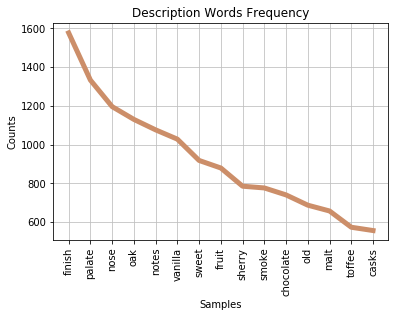

In [52]:
freq.plot(15, title='Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)










In [80]:
# df['style'].unique()

In [54]:
result = dict()
for word, frequency in freq.most_common(20):
    result[word] = frequency
print(result)

{'finish': 1577, 'palate': 1333, 'nose': 1196, 'oak': 1130, 'notes': 1076, 'vanilla': 1028, 'sweet': 918, 'fruit': 879, 'sherry': 785, 'smoke': 776, 'chocolate': 740, 'old': 687, 'malt': 657, 'toffee': 573, 'casks': 556, 'peat': 550, 'fruits': 547, 'orange': 539, 'honey': 536, 'spice': 531}


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]), <a list of 10 Text yticklabel objects>)

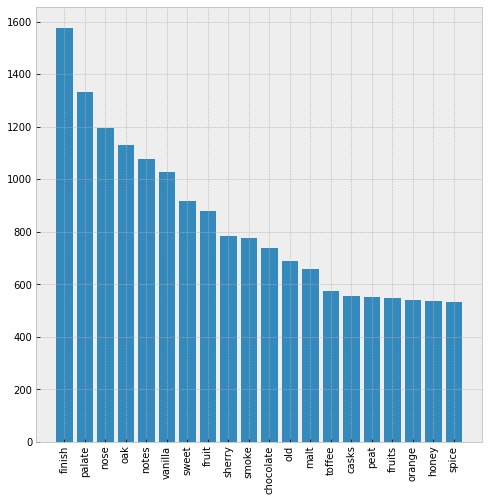

In [55]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.figure(figsize=(8,8), facecolor="white")
plt.bar(range(len(result)), list(result.values()), align='center')
plt.xticks(range(len(result)), list(result.keys()), rotation='vertical', color="black")
plt.yticks(color="black")

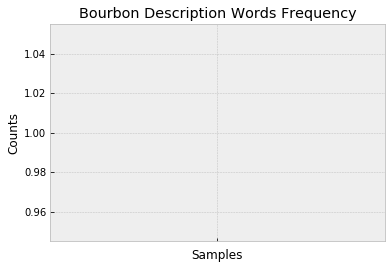

In [89]:
# text=df["description"].str.cat(sep=' ').lower().strip()
# text=text.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# print(text)
# clean_text=text.split(" ")    
# print(clean_text[0:6])
# for word in clean_text:
#     if word in sr:        
#         clean_text.remove(word)
# tokens=[]
# for word in clean_text:
#     tokens.append(word)
# print(tokens)
# clean_tokens = tokens[:]
# for token in tokens:
#     if token in sr:
#         clean_tokens.remove(token)
# freq = nltk.FreqDist(clean_tokens)
# for key,val in freq.items():
#     print(str(key) + ':' + str(val))
# freq.plot(15, title='Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
# result = dict()
# for word, frequency in freq.most_common(20):
#     result[word] = frequency
# print(result)




# text_1=blended_df["description"].str.cat(sep=' ').lower().strip()
# text_1=text_1.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# clean_text_1=text_1.split(" ")    
# for word in clean_text_1:
#     if word in sr:        
#         clean_text_1.remove(word)
# tokens_1=[]
# for word in clean_text_1:
#     tokens_1.append(word)
# clean_tokens_1 = tokens_1[:]
# for token_1 in tokens_1:
#     if token_1 in sr:
#         clean_tokens_1.remove(token_1)
# freq_1 = nltk.FreqDist(clean_tokens_1)
# freq_1.plot(15, title='Blended Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
# result_1 = dict()
# for word, frequency in freq_1.most_common(20):
#     result_1[word] = frequency


text_2=bourbon_df["description"].str.cat(sep=' ').lower().strip()
text_2=text_2.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
clean_text_2=text_2.split(" ")    
for word in clean_text_2:
    if word in sr:        
        clean_text_2.remove(word)
tokens_2=[]
for word in clean_text_2:
    tokens_2.append(word)
clean_tokens_2 = tokens_2[:]
for token_2 in tokens_2:
    if token_2 in sr:
        clean_tokens_2.remove(token_2)
freq_2 = nltk.FreqDist(clean_tokens_2)
freq_2.plot(15, title='Bourbon Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
result_2 = dict()
for word, frequency in freq_2.most_common(20):
    result_2[word] = frequency


# text_3=flavored_df["description"].str.cat(sep=' ').lower().strip()
# text_3=text_3.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# clean_text_3=text_3.split(" ")    
# for word in clean_text_3:
#     if word in sr:        
#         clean_text_3.remove(word)
# tokens_3=[]
# for word in clean_text_3:
#     tokens_3.append(word)
# clean_tokens_3 = tokens_3[:]
# for token_3 in tokens_3:
#     if token_3 in sr:
#         clean_tokens_3.remove(token_3)
# freq_3 = nltk.FreqDist(clean_tokens_3)
# freq_3.plot(15, title='Flavored Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
# result_3 = dict()
# for word, frequency in freq_3.most_common(20):
#     result_3[word] = frequency


# text_4=other_df["description"].str.cat(sep=' ').lower().strip()
# text_4=text_4.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# clean_text_4=text_4.split(" ")    
# for word in clean_text_4:
#     if word in sr:        
#         clean_text_4.remove(word)
# tokens_4=[]
# for word in clean_text_4:
#     tokens_4.append(word)
# clean_tokens_4 = tokens_4[:]
# for token_4 in tokens_4:
#     if token_4 in sr:
#         clean_tokens_4.remove(token_4)
# freq_4 = nltk.FreqDist(clean_tokens_4)
# freq_4.plot(15, title='Other Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
# result_4 = dict()
# for word, frequency in freq_4.most_common(20):
#     result_4[word] = frequency


# text_5=rye_df["description"].str.cat(sep=' ').lower().strip()
# text_5=text_5.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# clean_text_5=text_5.split(" ")    
# for word in clean_text_5:
#     if word in sr:        
#         clean_text_5.remove(word)
# tokens_5=[]
# for word in clean_text_5:
#     tokens_5.append(word)
# clean_tokens_5 = tokens_5[:]
# for token_5 in tokens_5:
#     if token_5 in sr:
#         clean_tokens_5.remove(token_5)
# freq_5 = nltk.FreqDist(clean_tokens_5)
# freq_5.plot(15, title='Rye Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
# result_5 = dict()
# for word, frequency in freq_5.most_common(20):
#     result_5[word] = frequency


# text_6=scotch_df["description"].str.cat(sep=' ').lower().strip()
# text_6=text_6.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# clean_text_6=text_6.split(" ")    
# for word in clean_text_6:
#     if word in sr:        
#         clean_text_6.remove(word)
# tokens_6=[]
# for word in clean_text_6:
#     tokens_6.append(word)
# clean_tokens_6 = tokens_6[:]
# for token_6 in tokens_6:
#     if token_6 in sr:
#         clean_tokens_6.remove(token_6)
# freq_6 = nltk.FreqDist(clean_tokens_6)
# freq_6.plot(15, title='Scotch Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
# result_6 = dict()
# for word, frequency in freq_6.most_common(20):
#     result_6[word] = frequency

    
# text_7=grain_df["description"].str.cat(sep=' ').lower().strip()
# text_7=text_7.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# clean_text_7=text_7.split(" ")    
# for word in clean_text_7:
#     if word in sr:        
#         clean_text_7.remove(word)
# tokens_7=[]
# for word in clean_text_7:
#     tokens_7.append(word)
# clean_tokens_7 = tokens_7[:]
# for token_7 in tokens_7:
#     if token_7 in sr:
#         clean_tokens_7.remove(token_7)
# freq_7 = nltk.FreqDist(clean_tokens_7)
# freq_7.plot(15, title='Grain Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
# result_7 = dict()
# for word, frequency in freq_7.most_common(20):
#     result_7[word] = frequency

# text_8=malt_df["description"].str.cat(sep=' ').lower().strip()
# text_8=text_8.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# clean_text_8=text_8.split(" ")    
# for word in clean_text_8:
#     if word in sr:        
#         clean_text_8.remove(word)
# tokens_8=[]
# for word in clean_text_8:
#     tokens_8.append(word)
# clean_tokens_8 = tokens_8[:]
# for token_8 in tokens_8:
#     if token_8 in sr:
#         clean_tokens_8.remove(token_8)
# freq_8 = nltk.FreqDist(clean_tokens_8)
# freq_8.plot(15, title='Malt Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
# result_8 = dict()
# for word, frequency in freq_8.most_common(20):
#     result_8[word] = frequency

    
# text_9=world_df["description"].str.cat(sep=' ').lower().strip()
# text_9=text_9.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
# clean_text_9=text_9.split(" ")    
# for word in clean_text_9:
#     if word in sr:        
#         clean_text_9.remove(word)
# tokens_9=[]
# for word in clean_text_9:
#     tokens_9.append(word)
# clean_tokens_9 = tokens_9[:]
# for token_9 in tokens_9:
#     if token_9 in sr:
#         clean_tokens_9.remove(token_9)
# freq_9 = nltk.FreqDist(clean_tokens_9)
# freq_9.plot(15, title='World Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
# result_9 = dict()
# for word, frequency in freq_9.most_common(20):
#     result_9[word] = frequency



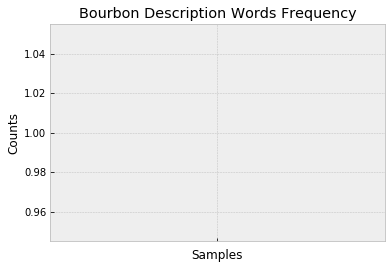

                           Maker  distilled  age in cast     ABV  Blended  \
row_caller                                                                  
5540                     Sazerac        NaN  18 year old  45.00%        0   
6401                  Four Roses     2013.0          NaN  51.50%        0   
6402           Parker's Heritage        NaN          NaN  50.00%        0   
6403            Pappy Van Winkle        NaN  23 year old  47.80%        0   
6404        William Larue Weller        NaN          NaN  67.40%        0   
6405        William Larue Weller        NaN          NaN  63.30%        0   
6406        William Larue Weller     2018.0  12 year old  62.85%        0   
6407                  Four Roses     2012.0          NaN  55.70%        0   
6408                  Four Roses     2017.0          NaN  54.49%        0   
6409             George T. Stagg        NaN          NaN  71.40%        0   
6410             George T. Stagg        NaN          NaN  69.05%        0   

In [97]:

text_2=bourbon_df["description"].str.cat(sep=' ').lower().strip()
text_2=text_2.replace("  ", " ").replace(".", "").replace(",", "").replace("!", "").replace("'", "").replace('"', "").replace(";", "").replace(":", "").replace("(", "").replace(")", "").replace("/", "")
clean_text_2=text_2.split(" ")    
for word in clean_text_2:
    if word in sr:        
        clean_text_2.remove(word)
tokens_2=[]
for word in clean_text_2:
    tokens_2.append(word)
clean_tokens_2 = tokens_2[:]
for token_2 in tokens_2:
    if token_2 in sr:
        clean_tokens_2.remove(token_2)
freq_2 = nltk.FreqDist(clean_tokens_2)
freq_2.plot(15, title='Bourbon Description Words Frequency', color='#CC8E69', linewidth=5, cumulative=False)
result_2 = dict()
for word, frequency in freq_2.most_common(20):
    result_2[word] = frequency
print(bourbon_df)


In [93]:
bourbon_df

,Maker,distilled,age in cast,ABV,Blended,Bourbon,Flavored,Other,Rye,Scotch,single blended grain,single blended malt,world,review score,price,style,country,row_other,description
row_caller,,,,,,,,,,,,,,,,,,,
5540,Sazerac,NaN,18 year old,45.00%,0,1,0,0,1,0,0,0,0,95,80,Bourbon/Tennessee,US,NaN,NaN
6401,Four Roses,2013.0,NaN,51.50%,0,1,0,0,0,0,0,0,0,97,85,Bourbon/Tennessee,US,NaN,NaN
6402,Parker's Heritage,NaN,NaN,50.00%,0,1,0,0,0,0,0,0,0,97,150,Bourbon/Tennessee,US,NaN,NaN
6403,Pappy Van Winkle,NaN,23 year old,47.80%,0,1,0,0,0,0,0,0,0,96,220,Bourbon/Tennessee,US,NaN,NaN
6404,William Larue Weller,NaN,NaN,67.40%,0,1,0,0,0,0,0,0,0,96,65,Bourbon/Tennessee,US,NaN,NaN
6405,William Larue Weller,NaN,NaN,63.30%,0,1,0,0,0,0,0,0,0,96,70,Bourbon/Tennessee,US,NaN,NaN
6406,William Larue Weller,2018.0,12 year old,62.85%,0,1,0,0,0,0,0,0,0,96,99,Bourbon/Tennessee,US,NaN,NaN
6407,Four Roses,2012.0,NaN,55.70%,0,1,0,0,0,0,0,0,0,96,90,Bourbon/Tennessee,US,NaN,NaN
6408,Four Roses,2017.0,NaN,54.49%,0,1,0,0,0,0,0,0,0,96,150,Bourbon/Tennessee,US,NaN,NaN


In [ ]:
###NONTEXT ANALYSIS DIGGING###

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4726 entries, 1 to 8249
Data columns (total 19 columns):
Maker                   4726 non-null object
distilled               773 non-null float64
age in cast             1842 non-null object
ABV                     4700 non-null object
Blended                 4726 non-null int64
Bourbon                 4726 non-null int64
Flavored                4726 non-null int64
Other                   4726 non-null int64
Rye                     4726 non-null int64
Scotch                  4726 non-null int64
single blended grain    4726 non-null int64
single blended malt     4726 non-null int64
world                   4726 non-null int64
review score            4726 non-null int64
price                   4726 non-null int64
style                   4726 non-null object
country                 4726 non-null object
row_other               2446 non-null float64
description             2446 non-null object
dtypes: float64(2), int64(11), object(6)
memory 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14]),
 <a list of 8 Text yticklabel objects>)

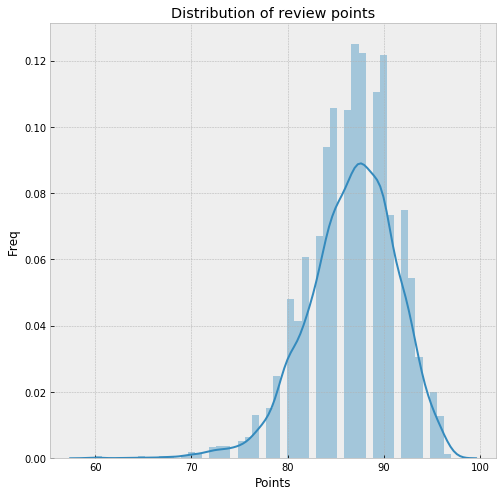

In [61]:
import seaborn as sns
plt.figure(figsize=(8,8), facecolor="white")
# plt.bar(df['style'], height=df['review.point'])
sns.distplot(df['review score'])
plt.style.use('bmh')
plt.title('Distribution of review points',color="black")
plt.xlabel('Points', color="black")
plt.ylabel('Freq', color="black")
plt.xticks(color="black")
plt.yticks(color="black")

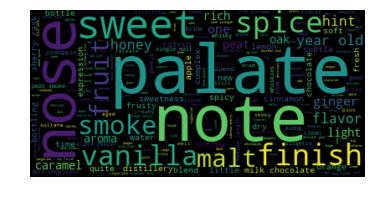

In [62]:
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(clean_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

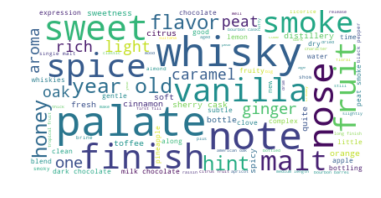

In [63]:

wordcloud = WordCloud(max_font_size=50,max_words=100,background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text(0, 0.5, 'Review Score (overall mean: 86)')

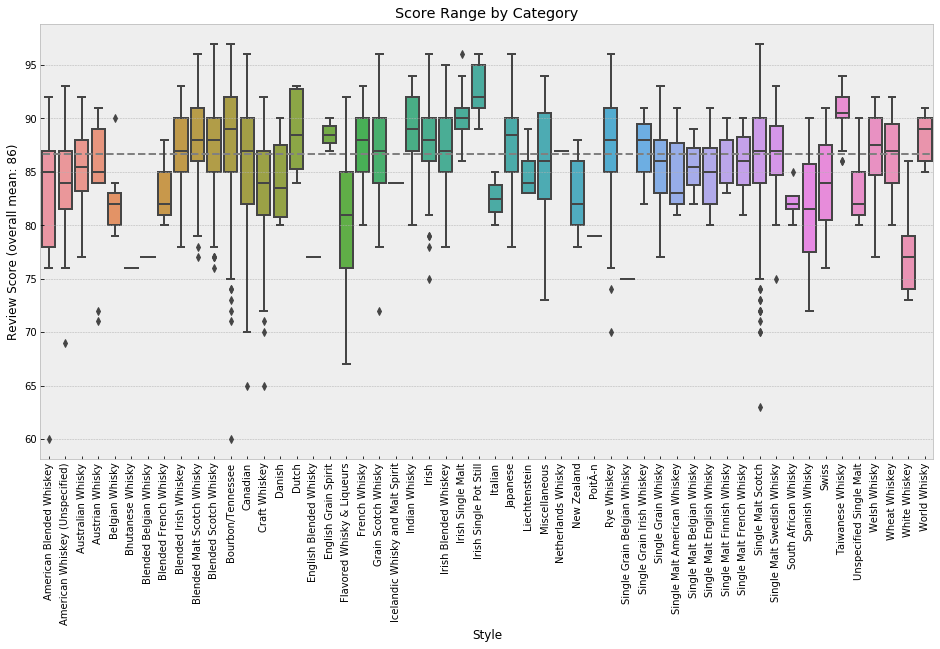

In [66]:
meanrounded=int(df['review score'].mean())
df=df.sort_values(by=['style'])
plt.figure(figsize=(16,8))
p=sns.boxplot(df['style'],df['review score'])
plt.title("Score Range by Category", color="black")
plt.xlabel('Style', color="black")
plt.yticks(color="black")
plt.xticks(rotation=90, color="black")
plt.hlines(df['review score'].mean(), -1, df['review score'].count(), colors='grey', linestyles='dashed', data=None)
plt.ylabel('Review Score (overall mean: ' + str(meanrounded) + ')', color="black")



Text(0, 0.5, 'Review Score (overall mean: 86)')

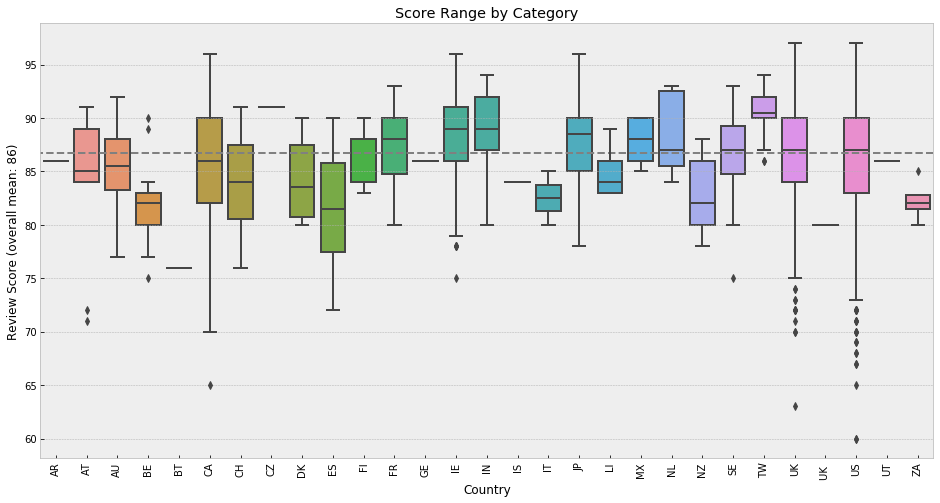

In [67]:
meanrounded=int(df['review score'].mean())
df=df.sort_values(by=['country'])
plt.figure(figsize=(16,8))
p=sns.boxplot(df['country'],df['review score'])
plt.title("Score Range by Category", color="black")
plt.xlabel('Country', color="black")
plt.yticks(color="black")
plt.xticks(rotation=90, color="black")
plt.hlines(df['review score'].mean(), -1, df['review score'].count(), colors='grey', linestyles='dashed', data=None)
plt.ylabel('Review Score (overall mean: ' + str(meanrounded) + ')', color="black")
